In [19]:
import numpy as np
import matplotlib
from matplotlib.ticker import MaxNLocator, FixedLocator, LinearLocator
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Ellipse
import matplotlib.cm as cm
from matplotlib import rc
rc('text', usetex=True)
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.collections import PatchCollection
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
font0 = FontProperties()
font = font0.copy()
font.set_size(30)
font.set_family('serif')
labelfont=font0.copy()
labelfont.set_size(24)
labelfont.set_weight('bold')
params= {'text.latex.preamble' : [r'\usepackage{inputenc}']}
plt.rcParams.update(params)

legendfont=font0.copy()
legendfont.set_size(18)
legendfont.set_weight('bold')

/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.8/lib/python3.8/_collections_abc.py:834: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


In [20]:
redcol='#e41a1c'
bluecol='#1f78b5'
grncol='#33a12c'
purcol='#613d9b'
pinkcol='#fc9b9a'
orcol='#ff7f00'

In [21]:
OPERA = np.loadtxt("OPERA_90CL.csv", delimiter=",")
SBN = np.loadtxt("SBN_3sigma.csv", delimiter=",")

MuB_Inclusive = np.loadtxt("Inclusive_NoBkgOsc_Chi2.dat")
dm41V = np.unique(MuB_Inclusive.T[0])
ssqthV = np.unique(MuB_Inclusive.T[1])

#Asimov Expectation, Full Covariance
ch2VAs = (MuB_Inclusive.T[2]).reshape(len(dm41V), len(ssqthV))

#Asimov Expectation, After applying constraint
ch2VAsPC = (MuB_Inclusive.T[3]).reshape(len(dm41V), len(ssqthV))

#Data result, full covariance
ch2V = (MuB_Inclusive.T[4]).reshape(len(dm41V), len(ssqthV))


MB = np.loadtxt("MiniBooNE_chi2.dat")
MB_dmsq = np.unique(MB.T[0])
MB_ssqt = np.unique(MB.T[1])
MB_ch2 = (MB.T[2]).reshape(len(MB_dmsq), len(MB_ssqt))

Text(-10, -10, '$\\textrm{Arg\\"{u}elles\\ et.\\ al.\\ 2021}$')

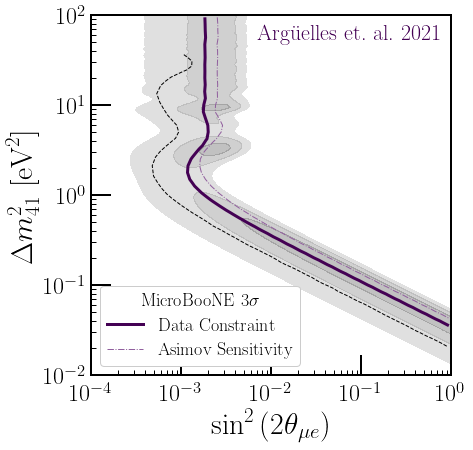

In [22]:
figwid = 5.0
fighei = 5.0
lside = 1.5
rside = 0.5
wwspace = 0.8

ncol = 1
nrow = 1

wid = lside + ncol*figwid + (ncol-1)*wwspace + rside

bot = 1.0
top = 0.5
hhspace = 0.05

hei = bot + nrow*fighei + (nrow-1)*hhspace + top

lfactor = lside/wid
rfactor = rside/wid
bfactor = bot/hei
tfactor = top/hei
wfactor = wwspace/figwid
hfactor = hhspace/fighei

matplotlib.rcParams['axes.linewidth'] = 2.0
fig, axes = plt.subplots(nrow, ncol, figsize=(wid, hei), facecolor='1.0');
fig.subplots_adjust(left = lfactor, bottom=bfactor, right=(1.0-rfactor), top=(1.0-tfactor), wspace=wfactor, hspace=hfactor);

xmin, xmax, ymin, ymax = 1e-4, 1, 1e-2, 1e2

ax = axes
ax.set_xscale('log')
ax.set_yscale('log')
ax.axis([xmin, xmax, ymin, ymax])
ax.plot([xmin, xmin, xmax, xmax, xmin], [ymin, ymax, ymax, ymin, ymin], ls='-', color='k', lw=2, zorder=30)
ax.set_xlabel(r"$\sin^2\left(2\theta_{\mu e}\right)$", fontproperties=font)        
ax.set_ylabel(r'$\Delta m_{41}^2\ [\mathrm{eV}^2]$', fontproperties=font)        

ax.xaxis.set_major_locator(FixedLocator((1e-4, 1e-3, 1e-2, 1e-1, 1)))
ax.yaxis.set_major_locator(FixedLocator((1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100)))
ax.tick_params(direction='in', zorder=30, length=20, width=2)
ax.tick_params(direction='in', which='minor', zorder=30, length=5, width=1)
[l.set_size(labelfont.get_size()) for l in ax.get_xticklabels()]
[l.set_size(labelfont.get_size()) for l in ax.get_yticklabels()]
[l.set_position((0.5, -0.015)) for l in ax.get_xticklabels()]

#ax.plot(OPERA.T[0], OPERA.T[1], lw=2, color='#666666', ls='--', label=r"$\mathrm{OPERA}$")

levsAs = [np.min(ch2VAs)+11.83]
ax.contour(ssqthV, dm41V, ch2VAs, levels=levsAs, linestyles=['-.'], colors=['#915f9e'], linewidths=1, zorder=20)
levs = [np.min(ch2V) + 11.83]
ax.contour(ssqthV, dm41V, ch2V, levels=levs, linestyles=['-'], colors=['#440154'], linewidths=3)

levs0MB = np.min(MB_ch2)
levsMB = [levs0MB, levs0MB + 2.30, levs0MB + 6.18, levs0MB + 11.83]
ax.contourf(MB_ssqt, MB_dmsq, MB_ch2, levels=levsMB, colors=['#333333', '#666666', '#999999', '#CCCCCC'], alpha=0.3)

ax.plot(SBN.T[0], SBN.T[1], color='k', ls='--', lw=1)


ax.plot([xmin, xmax], [0.1*ymin, 0.1*ymin], lw=3, color='#440154', label=r"$\mathrm{Data\ Constraint}$")
ax.plot([xmin, xmax], [0.1*ymin, 0.1*ymin], lw=1, ls='-.', color='#915f9e', label=r"$\mathrm{Asimov\ Sensitivity}$")
ax.legend(loc=3, prop=legendfont, framealpha=1.0, title=r"$\mathrm{MicroBooNE\ 3}\sigma$", title_fontsize = legendfont.get_size())

ax.annotate(r"$\textrm{Arg\"{u}elles\ et.\ al.\ 2021}$", xy=(xmax, ymax), xytext=(-10, -10), textcoords="offset points", ha="right", va="top", size=22, color='#440154')

In [23]:
fig.savefig("AppearancePanel_NoBkgOsc.pdf")